In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

# My functions

In [2]:
#Import markdown tool
from IPython.display import Markdown
def mark(string):
    display(Markdown(string))

In [3]:
dataset = pd.read_csv('3. Uploaded Data/air.csv',header = 0)

In [4]:
display(dataset.info())
mark('**Data types of variables**')
display(dataset.dtypes.value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226030 entries, 0 to 226029
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              226030 non-null  int64  
 1   name                            226002 non-null  object 
 2   host_id                         226030 non-null  int64  
 3   host_name                       225997 non-null  object 
 4   neighbourhood_group             226030 non-null  object 
 5   neighbourhood                   226030 non-null  object 
 6   latitude                        226030 non-null  float64
 7   longitude                       226030 non-null  float64
 8   room_type                       226030 non-null  object 
 9   price                           226030 non-null  int64  
 10  minimum_nights                  226030 non-null  int64  
 11  number_of_reviews               226030 non-null  int64  
 12  last_review     

None

**Data types of variables**

object     8
int64      7
float64    3
dtype: int64

# 1. Woking with numerical values 

In [5]:
num_dataset = dataset.select_dtypes(include=['int64','float64'])
mark('**Numerical values**')
display(num_dataset.head(3))
mark('**Name of numerical values**')
display(num_dataset.columns.values)
mark('**Shape of our numerical table**')
display(num_dataset.shape)

**Numerical values**

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,1955800,10109001,39.74505,-104.99459,225,28,15,0.19,1,177
1,2953770,9236134,39.74368,-104.99673,225,31,23,0.31,1,88
2,4137490,860762,39.74458,-104.99588,190,30,5,0.25,1,317


**Name of numerical values**

array(['id', 'host_id', 'latitude', 'longitude', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'], dtype=object)

**Shape of our numerical table**

(226030, 10)

### 1.0.1 Dropping id and host_id columns. They are unique and we cant use them in our prediction model 

In [6]:
num_dataset.drop(['id', 'host_id'],axis=1,inplace=True)
display(num_dataset.head(2))

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,39.74505,-104.99459,225,28,15,0.19,1,177
1,39.74368,-104.99673,225,31,23,0.31,1,88


## 1.1 Linear Regression Base Line

In [7]:
import statsmodels.api as sm
y = num_dataset.price
X = num_dataset.loc[:, num_dataset.columns != 'price']
linear_regression = sm.OLS(y,X).fit()
display(linear_regression.summary())
mark('**MSE Total**')
display(linear_regression.mse_total)
del y,X,linear_regression

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.139
Model:                            OLS   Adj. R-squared (uncentered):              0.139
Method:                 Least Squares   F-statistic:                              5195.
Date:                Mon, 30 Nov 2020   Prob (F-statistic):                        0.00
Time:                        09:05:42   Log-Likelihood:                     -1.7539e+06
No. Observations:              226030   AIC:                                  3.508e+06
Df Residuals:                  226023   BIC:                                  3.508e+06
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
latitude                           1.6568      0.089     18.567      0.000       1.482       1.832
longitude                         -1.6430      0.032    -51.239      0.000      -1.706      -1.580
minimum_nights                    -0.3956      0.048     -8.177      0.000      -0.490      -0.301
number_of_reviews                 -0.3322      0.029    -11.542      0.000      -0.389      -0.276
reviews_per_month                -17.8888      1.147    -15.593      0.000     -20.137     -15.640
calculated_host_listings_count     0.2216      0.024      9.115      0.000       0.174       0.269
availability_365                   0.1329      0.009     15.305      0.000       0.116       0.150
==============================================================================
Omnibus:                   490252.678   Durbin-Watson:                   1.236
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       3415291491.835
Skew:                          19.570   Prob(JB):                         0.00
Kurtosis:                     603.921   Cond. No.                         224.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**MSE Total**

373577.1533203557

## 1 Exploring Outliers

### Outliers on the response

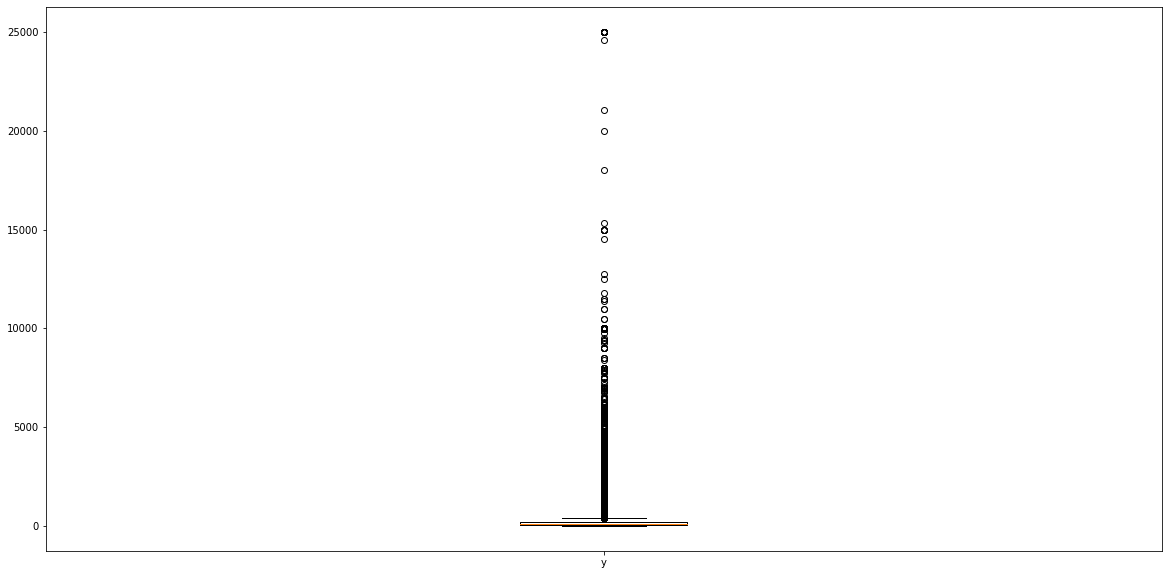

In [8]:
plt.figure(figsize=(20,10))
y = num_dataset.price
plt.boxplot(y,labels=('y'))
plt.show()

In [9]:
def get_summary_statistics(dataset):
    mean = np.round(np.mean(dataset), 2)
    median = np.round(np.median(dataset), 2)
    min_value = np.round(dataset.min(), 2)
    max_value = np.round(dataset.max(), 2)
    quartile_1 = np.round(dataset.quantile(0.25), 2)
    quartile_3 = np.round(dataset.quantile(0.75), 2)
    
    # Interquartile range
    iqr = np.round(quartile_3 - quartile_1, 2)
    upper = quartile_3+1.5*iqr
    lower = quartile_1-1.5*iqr
    
    print('Min: %s' % min_value)
    print('Mean: %s' % mean)
    print('Max: %s' % max_value)
    print('25th percentile: %s' % quartile_1)
    print('Median: %s' % median)
    print('75th percentile: %s' % quartile_3)
    print('Interquartile range (IQR): %s' % iqr)
    print ('Upper bounds (Q3+1.5*IQR) : %s' % upper)
    print ('Upper bounds (Q1-1.5*IQR) : %s' % lower)
    
    print('Upper 3*IQR : %s'%(quartile_3+3*iqr))
    print('Lower 3*IQR : %s'%(quartile_1-3*iqr))
    
get_summary_statistics(y)

Min: 0
Mean: 219.72
Max: 24999
25th percentile: 75.0
Median: 121.0
75th percentile: 201.0
Interquartile range (IQR): 126.0
Upper bounds (Q3+1.5*IQR) : 390.0
Upper bounds (Q1-1.5*IQR) : -114.0
Upper 3*IQR : 579.0
Lower 3*IQR : -303.0


In [10]:
print('Greater then 1.5 IQR (Upper bound) : ',y.loc[y>=390].count())
print(' Percent of values greater then 1.5 IQR (Upper bound) : %d%%'%((y.loc[y>=390].count()/y.count())*100) )
print('Count of price = 0 : ',y.loc[y==0].count())
print('Greater then 3 IQR (Upper bound) : ',y.loc[y>=579].count())
print(' Percent of values greater then 3 IQR (Upper bound) : %d%%'%((y.loc[y>=579].count()/y.count())*100) )

Greater then 1.5 IQR (Upper bound) :  22042
 Percent of values greater then 1.5 IQR (Upper bound) : 9%
Count of price = 0 :  62
Greater then 3 IQR (Upper bound) :  11855
 Percent of values greater then 3 IQR (Upper bound) : 5%


**I am deciding to delete all values that greater then our 3*IQR level whicj is only 5% of all data end also delete price with 0 values**

In [11]:
num_dataset.drop(num_dataset[(num_dataset.price>=579)|(num_dataset.price==0)].index, inplace = True)
num_dataset.reset_index(drop = True, inplace = True)
#Also i need to update my dataset
dataset.drop(dataset[(dataset.price>=579)|(dataset.price==0)].index, inplace = True)
dataset.reset_index(drop = True, inplace = True)
del y

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Outliers among the predictors

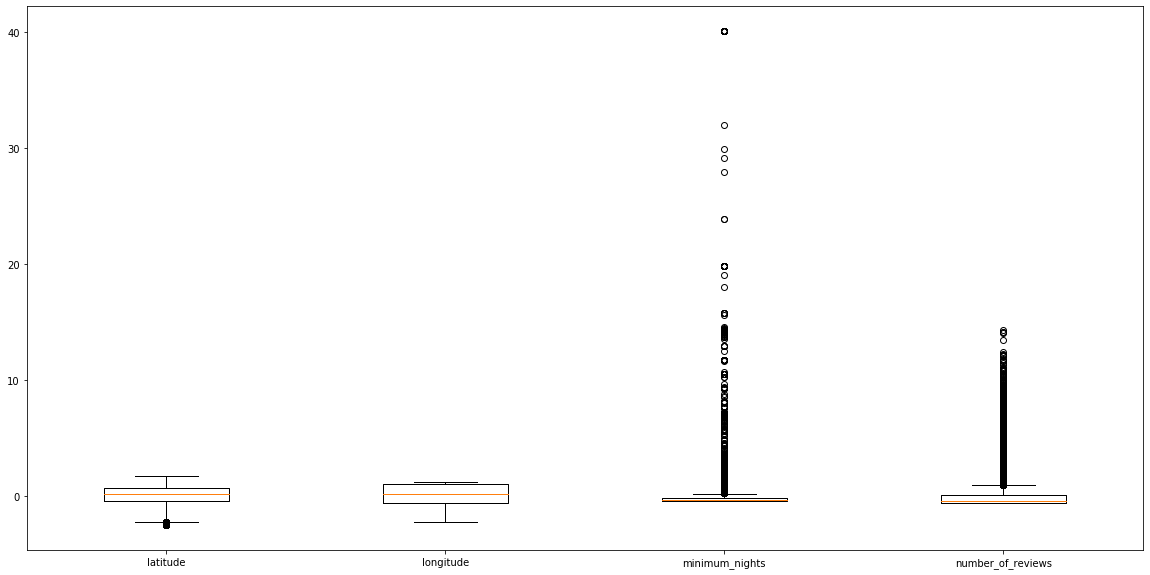

In [12]:
from sklearn.preprocessing import StandardScaler
X = num_dataset.loc[:, num_dataset.columns != 'price']
plt.figure(figsize=(20,10))
labels = X.columns
standardization = StandardScaler(with_mean=True, with_std=True)
num_stand = standardization.fit_transform(X)
boxplot = plt.boxplot(num_stand[:,0:4],labels=labels[0:4])

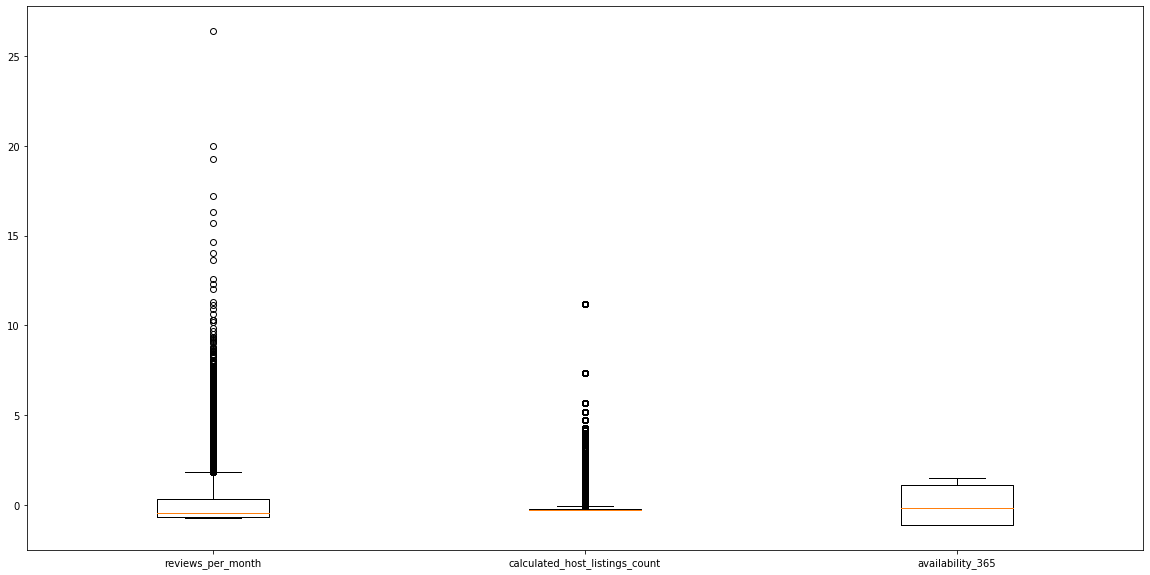

In [13]:
plt.figure(figsize=(20,10))
boxplot = plt.boxplot(num_stand[:,4:],labels=labels[4:])

### Minimun nights

In [14]:
get_summary_statistics(num_dataset.minimum_nights)

Min: 1
Mean: 10.21
Max: 1000
25th percentile: 1.0
Median: 2.0
75th percentile: 7.0
Interquartile range (IQR): 6.0
Upper bounds (Q3+1.5*IQR) : 16.0
Upper bounds (Q1-1.5*IQR) : -8.0
Upper 3*IQR : 25.0
Lower 3*IQR : -17.0


In [15]:
print('Greater then 1.5 IQR (Upper bound) : ',num_dataset.minimum_nights.loc[num_dataset.minimum_nights>=16].count())
print(' Percent of values greater then 1.5 IQR (Upper bound) : %d%%'%((num_dataset.minimum_nights.loc[num_dataset.minimum_nights>=16].count()/num_dataset.minimum_nights.count())*100) )
print('Greater then 3 IQR (Upper bound) : ',num_dataset.minimum_nights.loc[num_dataset.minimum_nights>=25].count())
print(' Percent of values greater then 3 IQR (Upper bound) : %d%%'%((num_dataset.minimum_nights.loc[num_dataset.minimum_nights>=25].count()/num_dataset.minimum_nights.count())*100) )

Greater then 1.5 IQR (Upper bound) :  45325
 Percent of values greater then 1.5 IQR (Upper bound) : 21%
Greater then 3 IQR (Upper bound) :  43886
 Percent of values greater then 3 IQR (Upper bound) : 20%


 **Was decided to replace all values where more than 30 nights equal  to 30**

In [16]:
num_dataset.minimum_nights.loc[num_dataset.minimum_nights>30]=30

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Number of reviews

In [17]:
get_summary_statistics(num_dataset.number_of_reviews)

Min: 0
Mean: 35.86
Max: 966
25th percentile: 1.0
Median: 9.0
75th percentile: 41.0
Interquartile range (IQR): 40.0
Upper bounds (Q3+1.5*IQR) : 101.0
Upper bounds (Q1-1.5*IQR) : -59.0
Upper 3*IQR : 161.0
Lower 3*IQR : -119.0


In [18]:
print('Greater then 1.5 IQR (Upper bound) : ',num_dataset.minimum_nights.loc[num_dataset.number_of_reviews>=101].count())
print(' Percent of values greater then 1.5 IQR (Upper bound) : %d%%'%((num_dataset.number_of_reviews.loc[num_dataset.number_of_reviews>=101].count()/num_dataset.number_of_reviews.count())*100) )
print('Greater then 3 IQR (Upper bound) : ',num_dataset.minimum_nights.loc[num_dataset.number_of_reviews>=161].count())
print(' Percent of values greater then 3 IQR (Upper bound) : %d%%'%((num_dataset.number_of_reviews.loc[num_dataset.number_of_reviews>=161].count()/num_dataset.number_of_reviews.count())*100) )

Greater then 1.5 IQR (Upper bound) :  23233
 Percent of values greater then 1.5 IQR (Upper bound) : 10%
Greater then 3 IQR (Upper bound) :  11262
 Percent of values greater then 3 IQR (Upper bound) : 5%


I decided not to change anything in the columns such as **Number of reviews**,**Reviews per month** since such outliers can be

### Calculated_host_listings_count

In [19]:
get_summary_statistics(num_dataset.calculated_host_listings_count)

Min: 1
Mean: 16.48
Max: 593
25th percentile: 1.0
Median: 2.0
75th percentile: 6.0
Interquartile range (IQR): 5.0
Upper bounds (Q3+1.5*IQR) : 13.5
Upper bounds (Q1-1.5*IQR) : -6.5
Upper 3*IQR : 21.0
Lower 3*IQR : -14.0


In [20]:
print('Greater then 1.5 IQR (Upper bound) : ',num_dataset.calculated_host_listings_count.loc[num_dataset.calculated_host_listings_count>=13.5].count())
print(' Percent of values greater then 1.5 IQR (Upper bound) : %d%%'%((num_dataset.calculated_host_listings_count.loc[num_dataset.calculated_host_listings_count>=13.5].count()/num_dataset.calculated_host_listings_count.count())*100) )
print('Greater then 3 IQR (Upper bound) : ',num_dataset.calculated_host_listings_count.loc[num_dataset.calculated_host_listings_count>=21].count())
print(' Percent of values greater then 3 IQR (Upper bound) : %d%%'%((num_dataset.calculated_host_listings_count.loc[num_dataset.calculated_host_listings_count>=21].count()/num_dataset.calculated_host_listings_count.count())*100) )

Greater then 1.5 IQR (Upper bound) :  36738
 Percent of values greater then 1.5 IQR (Upper bound) : 17%
Greater then 3 IQR (Upper bound) :  29780
 Percent of values greater then 3 IQR (Upper bound) : 13%


##  1.2 Working with skewness and kurtosis

### 1.2.1 Analysing Price Skewness

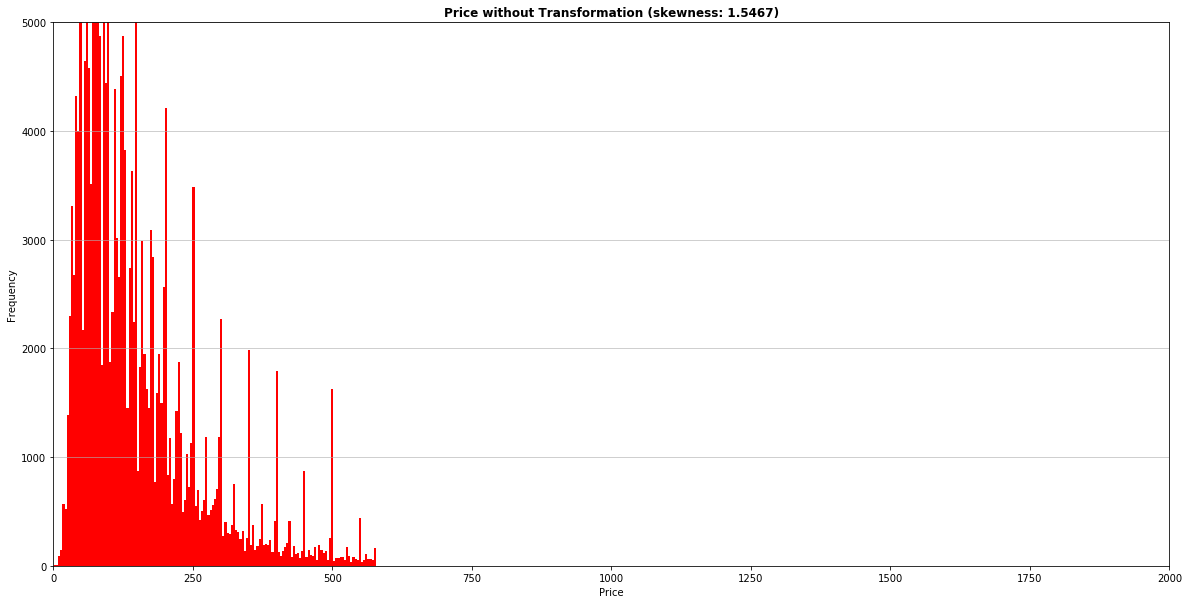

In [21]:
plt.figure(figsize=(20,10))
plt.hist(x=num_dataset.price, bins='auto', color='red')
plt.xlim([0,2000])
plt.ylim([0,5000])
plt.grid(axis='y', alpha=0.75)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Price without Transformation (skewness: {:0.4f})'.format(num_dataset.price.skew()),fontweight="bold")
plt.show()

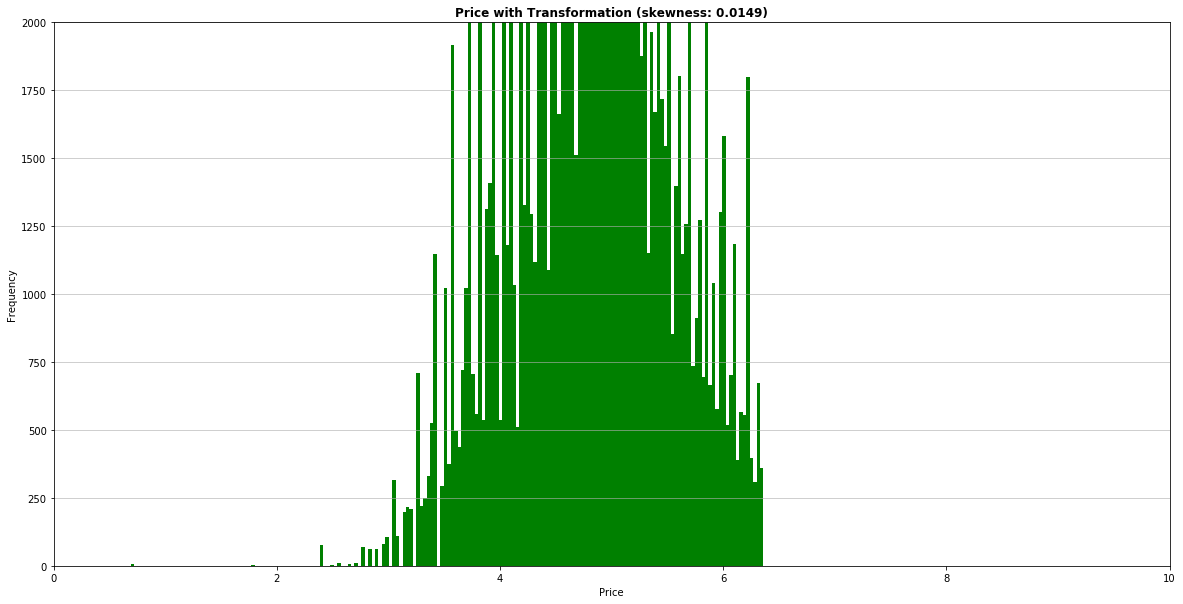

In [22]:
plt.figure(figsize=(20,10))
plt.hist(x=np.log1p(num_dataset.price), bins='auto', color='green')
plt.xlim([0,10])
plt.ylim([0,2000])
plt.grid(axis='y', alpha=0.75)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Price with Transformation (skewness: {:0.4f})'.format(np.log1p(num_dataset.price).skew()),fontweight="bold")
plt.show()

### 1.2.2 Analysing All numerical values skewness

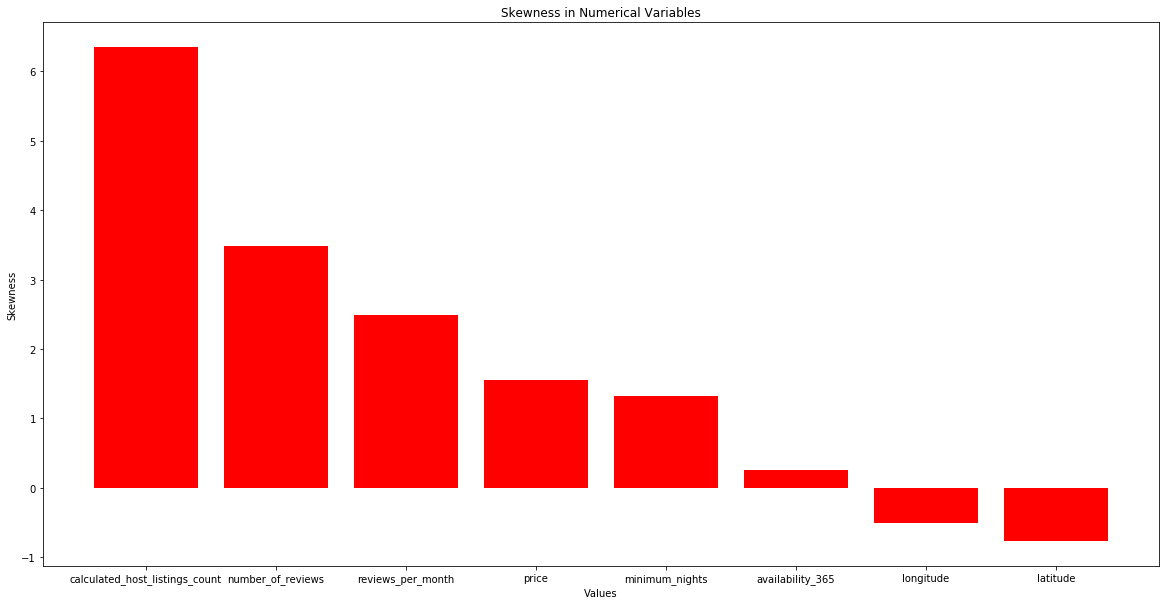

In [23]:
plt.figure(figsize=(20,10))
skew_merged = pd.DataFrame(data= num_dataset.skew(), columns = ['Skewness'])
skew_merged_sorted = skew_merged.sort_values(ascending = False, by = 'Skewness')
plt.bar(skew_merged_sorted.index, skew_merged_sorted.Skewness, color='red')
plt.title('Skewness in Numerical Variables')
plt.xlabel('Values')
plt.ylabel('Skewness')
plt.show()

In [24]:
mark("**Values to be transformed (skewness>0.75)**")
display(num_dataset.skew()[num_dataset.skew()>0.75].index.values) 

**Values to be transformed (skewness>0.75)**

array(['price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count'],
      dtype=object)

In [25]:
pd.options.mode.chained_assignment = None 

num_skewed = np.log1p(num_dataset[num_dataset.skew()[num_dataset.skew()>0.75].index])
num_norm = num_dataset[num_dataset.skew()[num_dataset.skew()<0.75].index]
num_all = pd.concat([num_skewed,num_norm],axis=1)
num_dataset.update(num_all)
display(num_dataset.skew())

del num_skewed,num_norm,num_all

latitude                         -0.769147
longitude                        -0.506369
price                             0.014855
minimum_nights                    0.930591
number_of_reviews                 0.169011
reviews_per_month                 0.874325
calculated_host_listings_count    1.627418
availability_365                  0.255110
dtype: float64

###  1.3 Kurtosis

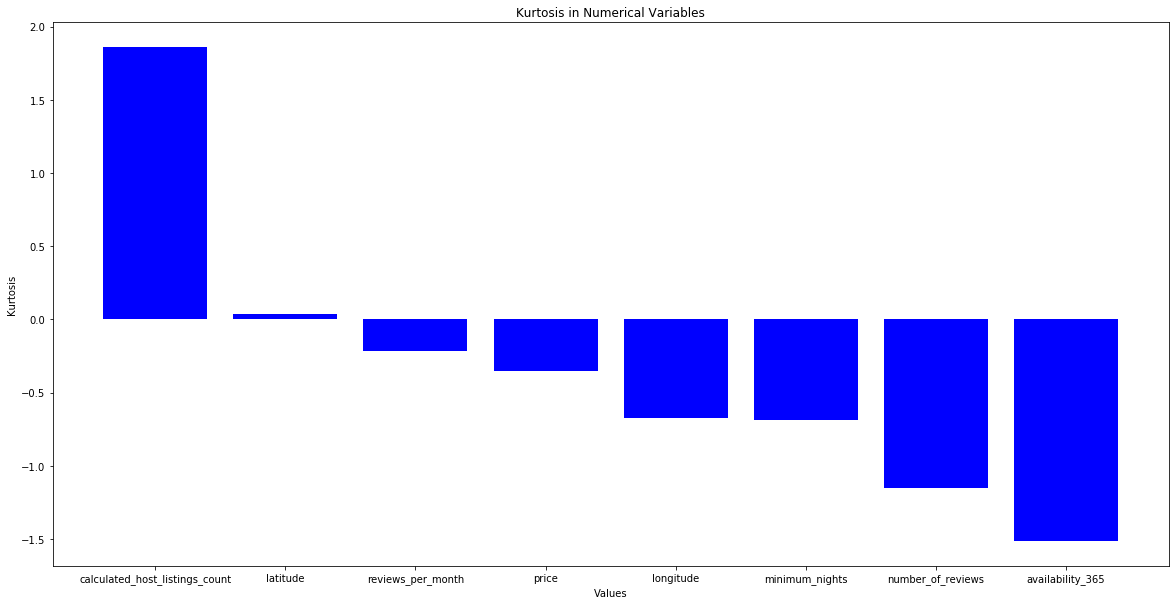

In [26]:
plt.figure(figsize=(20,10))
kurt_merged = pd.DataFrame(data= num_dataset.kurtosis(), columns = ['Kurtosis'])
kurt_merged_sorted = kurt_merged.sort_values(ascending = False, by = 'Kurtosis')
plt.bar(kurt_merged_sorted.index, kurt_merged_sorted.Kurtosis, color='Blue')
plt.title('Kurtosis in Numerical Variables')
plt.xlabel('Values')
plt.ylabel('Kurtosis')
plt.show()

### 1.2.3 Linear Regression after reducing skewness

In [27]:
y = num_dataset.price
X = num_dataset.loc[:, num_dataset.columns != 'price']
linear_regression = sm.OLS(y,X).fit()
display(linear_regression.summary())
mark('**MSE Total**')
display(linear_regression.mse_total)
del y,X,linear_regression

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                          1.043e+06
Date:                Mon, 30 Nov 2020   Prob (F-statistic):                        0.00
Time:                        09:05:45   Log-Likelihood:                     -2.5972e+05
No. Observations:              214113   AIC:                                  5.194e+05
Df Residuals:                  214106   BIC:                                  5.195e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
latitude                           0.0702      0.000    486.210      0.000       0.070       0.070
longitude                         -0.0198   5.25e-05   -376.488      0.000      -0.020      -0.020
minimum_nights                    -0.0399      0.002    -21.520      0.000      -0.044      -0.036
number_of_reviews                  0.0549      0.002     28.155      0.000       0.051       0.059
reviews_per_month                 -0.2300      0.006    -39.449      0.000      -0.241      -0.219
calculated_host_listings_count     0.0922      0.002     60.610      0.000       0.089       0.095
availability_365                   0.0007   1.32e-05     53.423      0.000       0.001       0.001
==============================================================================
Omnibus:                       81.224   Durbin-Watson:                   0.848
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.394
Skew:                          -0.046   Prob(JB):                     2.12e-18
Kurtosis:                       3.025   Cond. No.                         789.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**MSE Total**

23.25874459612698

### The next step would be to work with collinearity. Cond. No > 30 it's clear signal that unstable results are rendering the result less reliable.

## 1.3 Exploring Multicollinearity

### 1.3.1 Correlation Matrix

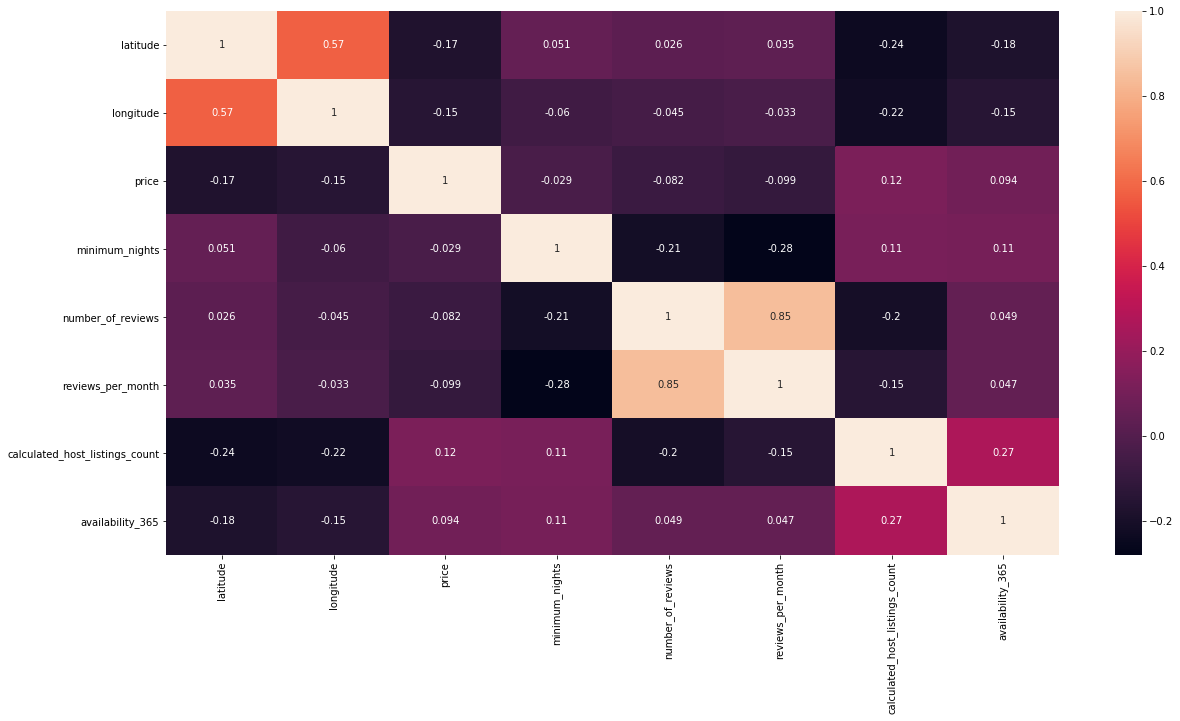

In [28]:
plt.figure(figsize=(20,10))
corrMatrix = num_dataset.corr()

sn.heatmap(corrMatrix, annot=True)
plt.show()

As we can see there are some values with high correlation > 50%. That's fairly explainable since **latitude** and **longtitude** describes one measure, **number_of_reviews** and **reviews_per_month_** are also connected. 

### 1.3.2 Automatic way to detect high correlated values

In [29]:
corr = num_dataset.loc[:, num_dataset.columns != 'price'].corr()
eigenvalues, eigenvectors = np.linalg.eig(corr)
print (eigenvalues)

[2.0701903  1.80309906 0.14532064 0.40097897 1.04983738 0.67216484
 0.85840882]


It shows us that values on index 2 is the smallest and near zero. 
#(Near zero values can represent a real problem for normal equations and other optimization methods based on matrix inversion.)

In [30]:
print(eigenvectors[:, 2])

[ 0.02475231  0.00372174 -0.06561851  0.70094028 -0.70671939  0.06510296
 -0.00772746]


We noticed that elemts on index 3 & 4 indeed outstanding in terms of absolute value

In [31]:
display(num_dataset.columns[3],num_dataset.columns[4])

'minimum_nights'

'number_of_reviews'

## 1.4 Estimating feature importance

In [32]:
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

linear_regression = LinearRegression(normalize=False, fit_intercept=True)
standardization = StandardScaler()

Stand_coef_linear_reg = make_pipeline(standardization,linear_regression)


In [33]:
y = num_dataset.price
X = num_dataset.loc[:, num_dataset.columns != 'price']
linear_regression.fit(X,y)
for coef, var in sorted(zip(map(abs,linear_regression.coef_), X.columns), reverse=True):
           print ("%6.3f %s" % (coef,var))

 0.154 reviews_per_month
 0.050 minimum_nights
 0.033 calculated_host_listings_count
 0.009 latitude
 0.009 number_of_reviews
 0.002 longitude
 0.000 availability_365


In [34]:
Stand_coef_linear_reg.fit(X,y)
for coef, var in sorted(zip(map(abs,Stand_coef_linear_reg.steps[1][1].coef_), X), reverse=True):
              print ("%6.3f %s" % (coef,var))

 0.090 reviews_per_month
 0.064 latitude
 0.051 longitude
 0.050 minimum_nights
 0.042 availability_365
 0.041 calculated_host_listings_count
 0.016 number_of_reviews


### Observing residuals

In [35]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
linear_regression = LinearRegression(fit_intercept=True)
y = num_dataset.price
X = num_dataset.loc[:, num_dataset.columns != 'price']

linear_regression.fit(X, y)
print ("R-squared: %0.3f" % r2_score(y, linear_regression.predict(X)))


R-squared: 0.054


In [36]:
residuals = y - linear_regression.predict(X)
print ("Head of residual %s" % residuals[:5])
print ("Mean of residuals: %0.3f" % np.mean(residuals))
print ("Standard deviation of residuals: %0.3f" % np.std(residuals))

Head of residual 0    0.721696
1    0.762956
2    0.531102
3   -0.389609
4    0.443789
Name: price, dtype: float64
Mean of residuals: -0.000
Standard deviation of residuals: 0.656


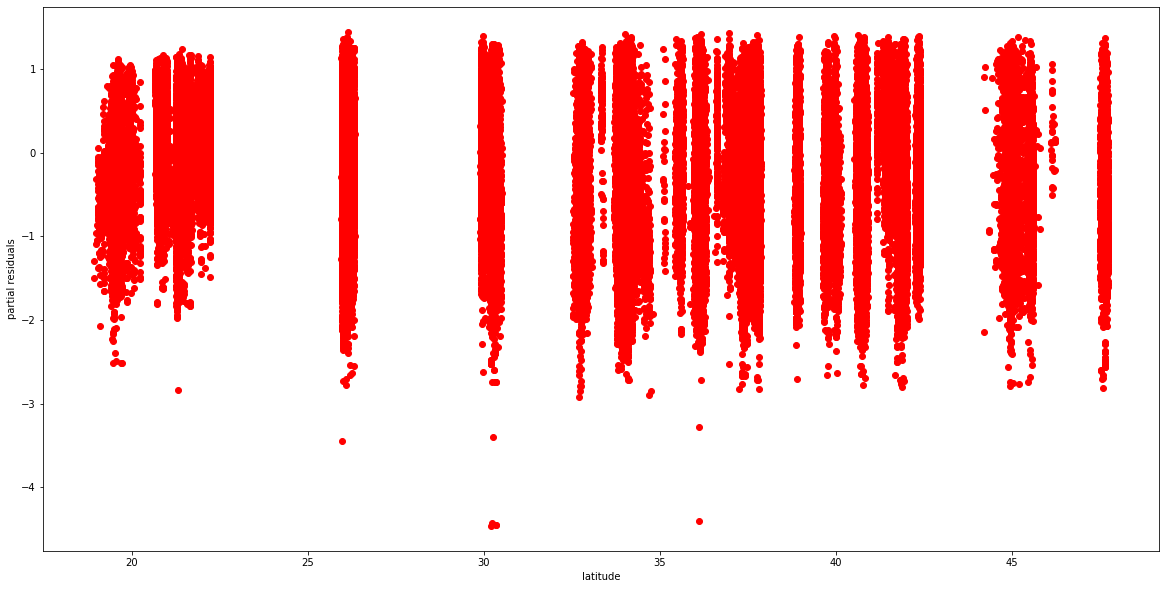

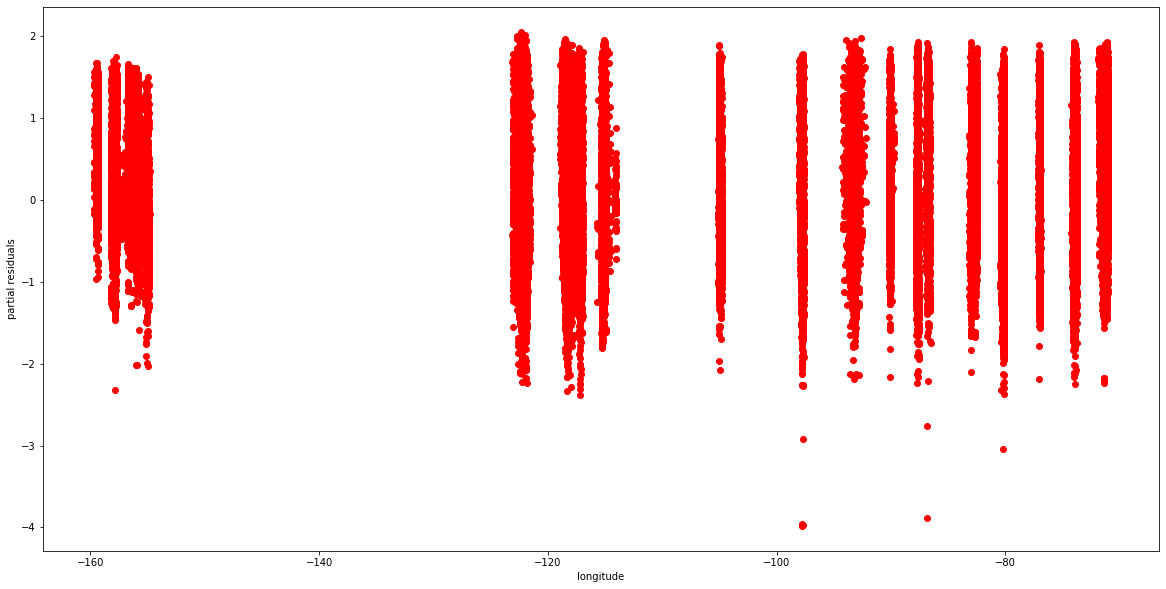

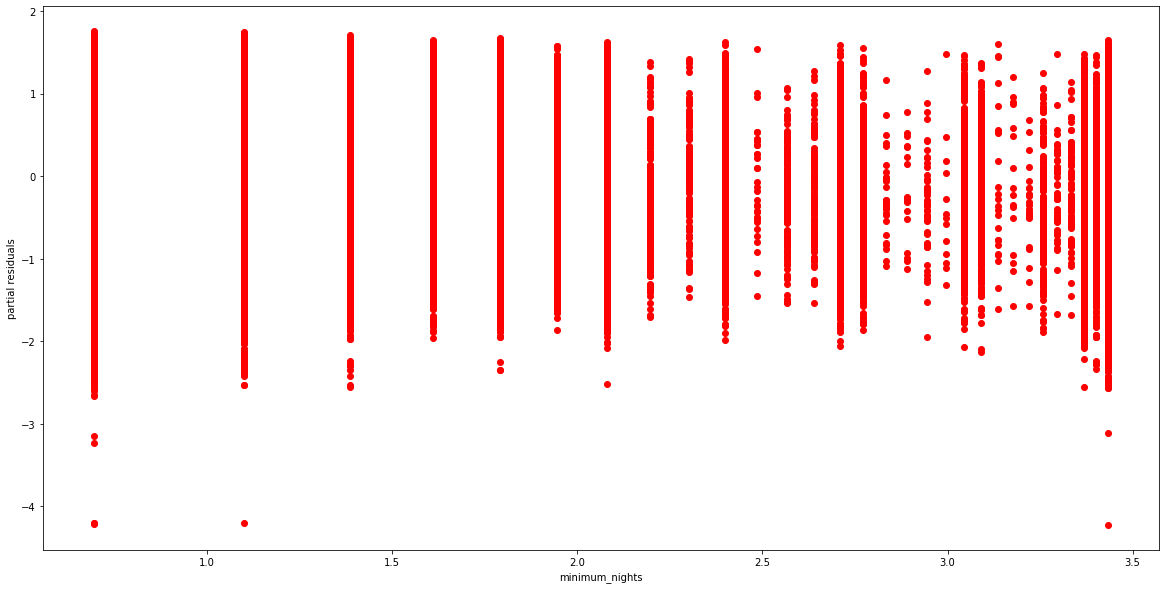

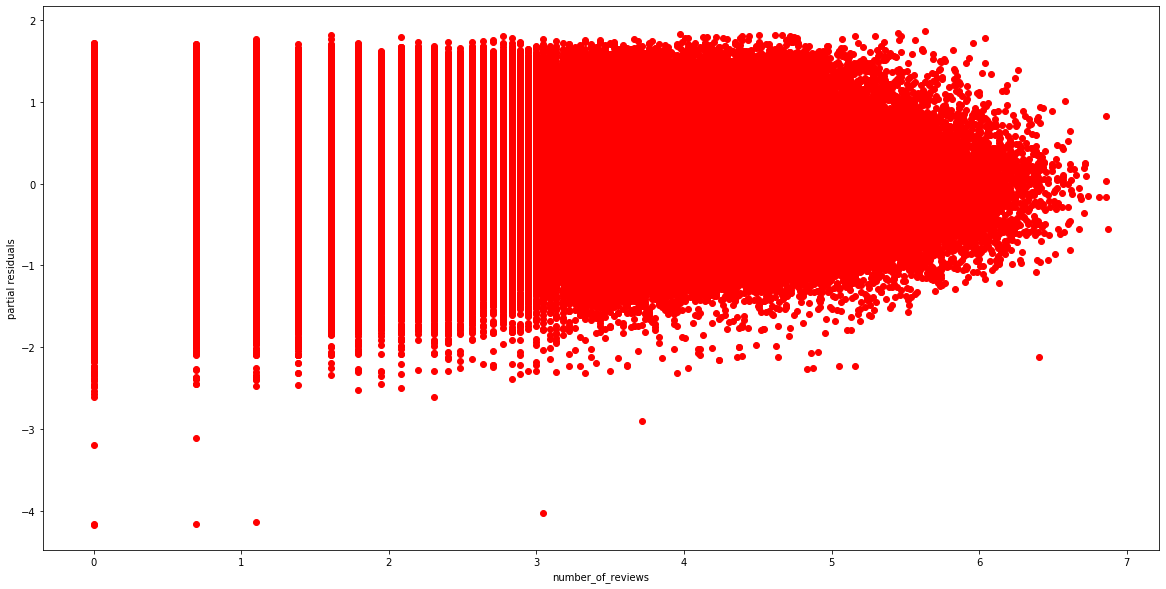

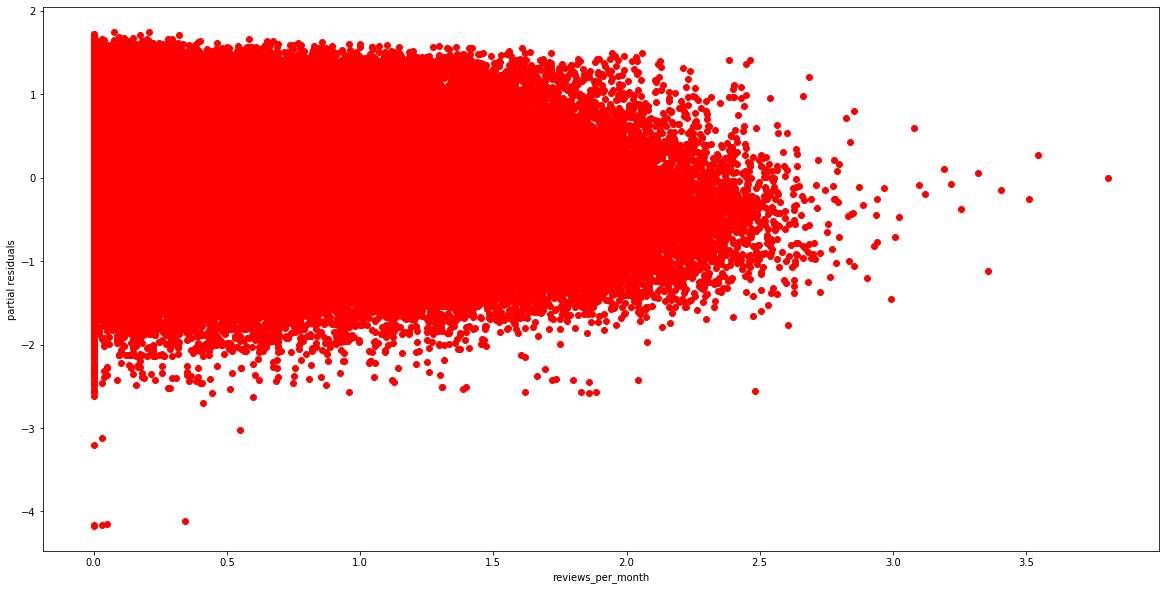

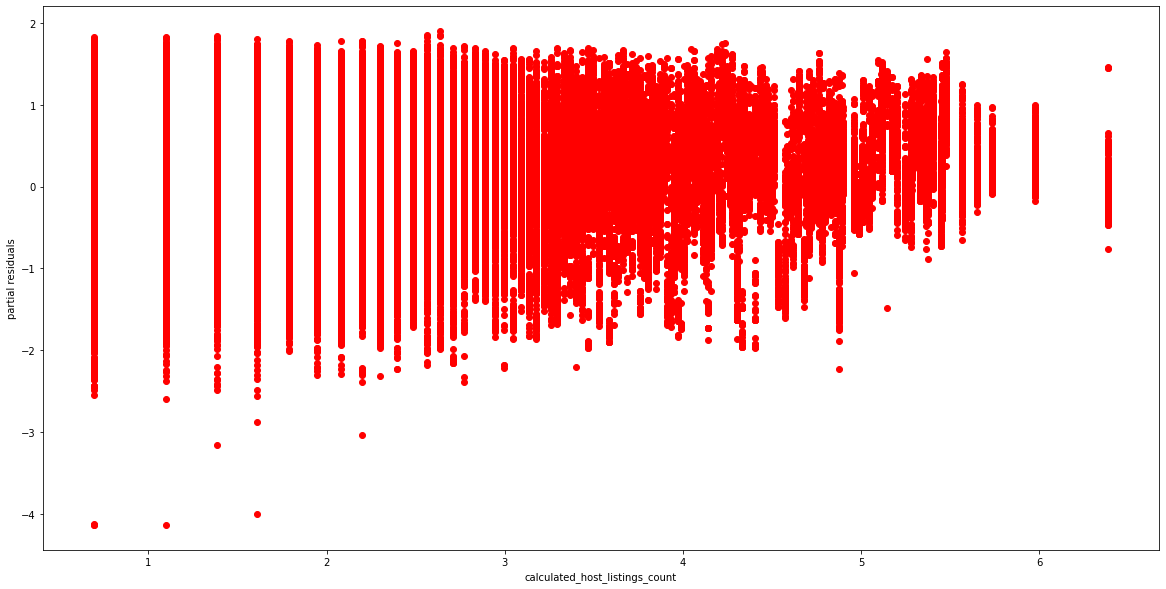

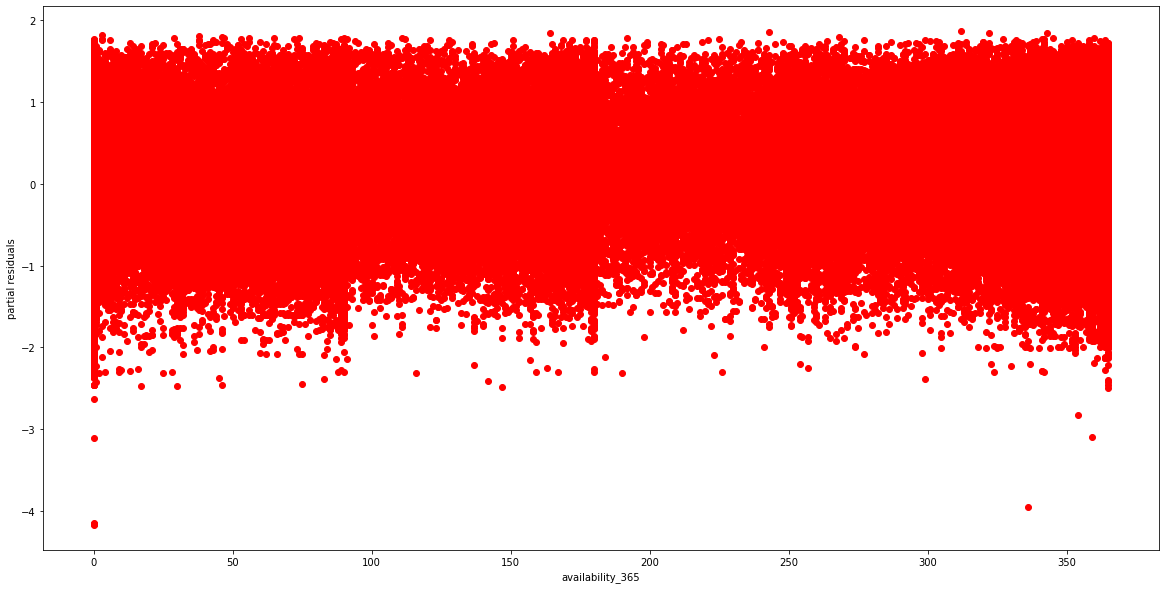

In [37]:
for var in range(len(X.columns)):
    plt.figure(figsize=(20,10))
    partial_residual = residuals + X.iloc[:, var] * linear_regression.coef_[var]
    plt.plot(X.iloc[:, var], partial_residual,'ro')
    plt.xlabel(X.columns[var])
    plt.ylabel('partial residuals')
    plt.show()

### Standardization 

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=True, with_std=True)
scaled = scaler.fit_transform(num_dataset)
num_dataset = pd.DataFrame(scaled, index=num_dataset.index, columns = num_dataset.columns)

# 2. Working with last_review column (missing values)

In [39]:
display(dataset.last_review.head())
mark('**Count of null values**')
display(dataset.last_review.isnull().sum())
display('Null is {:0.1f}% of all values'.format((dataset.last_review.isnull().sum()/dataset.last_review.size)*100))


0    2018-08-31 00:00:00
1    2017-06-11 00:00:00
2    2019-10-26 00:00:00
3    2019-04-16 00:00:00
4    2020-05-02 00:00:00
Name: last_review, dtype: object

**Count of null values**

42902

'Null is 20.0% of all values'

Due to the impossibility of replacing the missing data, was deceded to make boolean column (is review were or not)

In [40]:
dataset.last_review=dataset.last_review.isnull().astype(int).astype(object)
display(dataset.head(2))

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city,State
0,1955800,High-Rise Condo in Heart of Denver,10109001,Joey,None,CBD,39.74505,-104.99459,Entire home/apt,225,28,15,0,0.19,1,177,Denver,Colorado
1,2953770,Amazing Condo - in Denver's heart,9236134,Mason,None,CBD,39.74368,-104.99673,Entire home/apt,225,31,23,0,0.31,1,88,Denver,Colorado


# 3. Working with categorical values

In [41]:
categ_dataset = dataset.select_dtypes(include=['object'])
mark("**Object values**")
display(categ_dataset.head(5))
mark('**Name of object variables:**')
display(categ_dataset.columns.values)
mark('**Shape of our object table**')
display(categ_dataset.shape)
mark('**Count unique values due to each column**')
display(categ_dataset.nunique())

**Object values**

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review,city,State
0,High-Rise Condo in Heart of Denver,Joey,None,CBD,Entire home/apt,0,Denver,Colorado
1,Amazing Condo - in Denver's heart,Mason,None,CBD,Entire home/apt,0,Denver,Colorado
2,40th Floor with Endless Mountain & City Views,Corey,None,CBD,Entire home/apt,0,Denver,Colorado
3,‚òÄ‚ñë Downtown High Rise SPIRE - Furnished 1b...,Scott,None,CBD,Entire home/apt,0,Denver,Colorado
4,Downtown Mountain & City Views 2b/2ba,Carrie,None,CBD,Entire home/apt,0,Denver,Colorado


**Name of object variables:**

array(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'last_review', 'city', 'State'], dtype=object)

**Shape of our object table**

(214113, 8)

**Count unique values due to each column**

name                   206851
host_name               29765
neighbourhood_group        35
neighbourhood            1448
room_type                   4
last_review                 2
city                       28
State                      19
dtype: int64

Due to the lack of information content of the column "Name" and it is not possible to use it in the model, was decided to remove it

In [42]:
categ_dataset.drop(['name'],axis=1,inplace=True)
categ_dataset.last_review =categ_dataset.last_review.astype(int)

## 3.1 Encoding Categorical Variables

### 3.1.1 Room Type

In [43]:
categ_dataset.room_type.value_counts()

Entire home/apt    143327
Private room        65024
Shared room          3971
Hotel room           1791
Name: room_type, dtype: int64

In [44]:
categ_dataset = pd.concat([categ_dataset,pd.get_dummies(categ_dataset['room_type'])],axis=1)
# dropping room type and hotel room 
categ_dataset.drop(['room_type','Hotel room'],axis=1,inplace=True)
display(categ_dataset.head())

,host_name,neighbourhood_group,neighbourhood,last_review,city,State,Entire home/apt,Private room,Shared room
0,Joey,None,CBD,0,Denver,Colorado,1,0,0
1,Mason,None,CBD,0,Denver,Colorado,1,0,0
2,Corey,None,CBD,0,Denver,Colorado,1,0,0
3,Scott,None,CBD,0,Denver,Colorado,1,0,0
4,Carrie,None,CBD,0,Denver,Colorado,1,0,0


### 3.1.2 Host name , Neighbourhood

In [45]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
categ_dataset.host_name = encoder.fit_transform(categ_dataset.host_name.astype(str))
categ_dataset.neighbourhood = encoder.fit_transform(categ_dataset.neighbourhood.astype(str))

### 3.1.3 Creating dummy variables of Neighbourhood_group, City, State

In [46]:
mark('**Neighbourhood value count**')
display(categ_dataset.neighbourhood_group.value_counts())
mark('**City value count**')
display(categ_dataset.city.value_counts())
mark('**State value count**')
display(categ_dataset.State.value_counts())

**Neighbourhood value count**

None                    109076
Manhattan                19567
Brooklyn                 18082
City of Los Angeles      16546
Other Cities             10808
Maui                      7015
Honolulu                  5907
Queens                    5699
Hawaii                    4646
Kauai                     2903
Unincorporated Areas      2426
Other neighborhoods       1242
Newport                   1211
Bronx                     1175
Washington                1068
Providence                1029
Downtown                   978
Capitol Hill               671
Central Area               566
Queen Anne                 434
West Seattle               377
Ballard                    366
Rainier Valley             350
Staten Island              319
Cascade                    265
Beacon Hill                252
University District        234
Delridge                   201
Northgate                  149
Magnolia                   128
Lake City                  113
Kent                       106
Bristol 

**City value count**

New York City        44842
Los Angeles          29780
Hawaii               20471
San Diego            11466
Broward County       10138
Austin                9544
Clark County          8045
Washington D.C.       7030
San Clara Country     6900
San Francisco         6711
Seattle               6429
Chicago               6265
New Orleans           6189
Nashville             5853
Twin Cities MSA       4873
Portland              4182
Denver                4074
Rhode Island          3515
Boston                3237
Oakland               3154
San Mateo County      2741
Jersey City           2462
Asheville             2038
Santa Cruz County     1470
Columbus              1336
Cambridge             1015
Salem                  183
Pacific Grove          170
Name: city, dtype: int64

**State value count**

Califorina              52527
New Jersey              47304
Hawaii                  20471
Florida                 10138
California               9865
Texas                    9544
Nevada                   8045
District of Columbia     7030
Washington               6429
Illinois                 6265
Louisiana                6189
Tennessee                5853
Minnesota                4873
Oregon                   4365
Massachusetts            4252
Colorado                 4074
Rhode Island             3515
North Carolina           2038
Ohio                     1336
Name: State, dtype: int64

In [47]:
categ_dataset = pd.concat([categ_dataset,pd.get_dummies(categ_dataset[['neighbourhood_group','city','State']])],axis=1)
categ_dataset.drop(['neighbourhood_group','city','State','neighbourhood_group_Interbay','city_Pacific Grove','State_Ohio'],axis=1,inplace=True)

In [48]:
display(categ_dataset.head(2))
# display(categ_dataset.info())

,host_name,neighbourhood,last_review,Entire home/apt,Private room,Shared room,neighbourhood_group_Ballard,neighbourhood_group_Beacon Hill,neighbourhood_group_Bristol,neighbourhood_group_Bronx,...,State_Massachusetts,State_Minnesota,State_Nevada,State_New Jersey,State_North Carolina,State_Oregon,State_Rhode Island,State_Tennessee,State_Texas,State_Washington
0,12842,238,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,17916,238,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4 Combining catecorical and numerical tables

In [49]:
full_data = pd.concat([num_dataset,categ_dataset],axis=1)
X = full_data.loc[:, full_data.columns!='price']
y = full_data.price

### 4.1 Spliting datasets into train test samples

In [50]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=21)

## 5. Building model

In [51]:
"""Let's have a final look at our data"""
mark('**Data Dimension for Model Building:**')
print('Input matrix dimension:', X_train.shape)
print('Output vector dimension:',y_train.shape)
print('Test data dimension:', X_test.shape)

**Data Dimension for Model Building:**

Input matrix dimension: (171290, 92)
Output vector dimension: (171290,)
Test data dimension: (42823, 92)


### 5.0.1 Linear Regression

In [52]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

linear_regression = LinearRegression(fit_intercept=True)
linear_regression.fit(X_train, y_train)
prediction = linear_regression.predict(X_test)
print("R-squared: %0.3f" % r2_score(y_test,prediction))
mark('**MSE Total**')
display(mean_squared_error(y_test,prediction))
mark('**RMSE**')
display(np.sqrt(mean_squared_error(y_test,prediction)))

R-squared: 0.411


**MSE Total**

0.5916526701449556

**RMSE**

0.7691896191089396

### 5.0.2 Polynomial Regression

In [54]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
linear_regression = LinearRegression(fit_intercept=True)
for d in [2]:
    create_poly = PolynomialFeatures(degree=d,interaction_only=False, include_bias=False)
    poly = make_pipeline(create_poly,linear_regression)
    model = poly.fit(X_train,y_train)
    
print ("R2 degree - %2i polynomial :%0.3f"%(d,r2_score(y_test,model.predict(X_test))))


R2 degree -  2 polynomial :0.184


### 5.0.3 Lasso Regression (L1 Regularization)
**Can compress the coefficients of the model to zero, effectively reducing the number of features in the model**

In [55]:
from sklearn.linear_model import Lasso
reg = Lasso(alpha=0.00097)
reg.fit(X_train,y_train)
prediction = reg.predict(X_test)
print("R-squared: %0.3f" % r2_score(y_test,prediction))
mark('**MSE Total**')
display(mean_squared_error(y_test,prediction))
mark('**RMSE**')
display(np.sqrt(mean_squared_error(y_test,prediction)))

R-squared: 0.401


**MSE Total**

0.6021259215948255

**RMSE**

0.7759677323154781

In [57]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from scipy.stats import expon
np.random.seed(21)
lasso = Lasso()
cv_iterator = KFold(n_splits=5, shuffle=True, random_state=21)
search_func=RandomizedSearchCV(
    estimator=lasso, n_jobs=1, refit=True, n_iter=25,
    param_distributions={'alpha':np.logspace(-5,2,100)}, 
    scoring='neg_mean_squared_error', cv=cv_iterator)

search_func.fit(X_train, y_train)
print ('Best alpha: %0.5f' % search_func.best_params_['alpha'])
print ('Best CV mean squared error: %0.3f' % np.abs(
        search_func.best_score_))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113.4549853613571, tolerance: 13.71502913140389
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 256.4375687304564, tolerance: 13.65887209830911
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 255.2476281480922, tolerance: 13.691710760962076
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

Best alpha: 0.00005
Best CV mean squared error: 0.593


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41.32845426889253, tolerance: 17.108544964221
  positive)


### 5.0.4 Ridge

In [58]:
from sklearn.linear_model import  Ridge
reg = Ridge()
reg.fit(X_train,y_train)
prediction = reg.predict(X_test)
print("R-squared: %0.3f" % r2_score(y_test,prediction))
mark('**MSE Total**')
display(mean_squared_error(y_test,prediction))
mark('**RMSE**')
display(np.sqrt(mean_squared_error(y_test,prediction)))

R-squared: 0.407


**MSE Total**

0.5959792669333469

**RMSE**

0.771996934536237

### 5.0.5 ElasticNet

In [ ]:
from sklearn.linear_model import ElasticNet
# reg = ElasticNet()
# reg.fit(X_train,y_train)
# prediction = reg.predict(X_test)
# print("R-squared: %0.3f" % r2_score(y_test,prediction))
# mark('**MSE Total**')
# display(mean_squared_error(y_test,prediction))
# mark('**RMSE**')
# display(np.sqrt(mean_squared_error(y_test,prediction)))

elasticnet = ElasticNet(alpha=1.0, l1_ratio=0.15, normalize=True, max_iter=10**6, random_state=21)
search_func=RandomizedSearchCV(estimator=elasticnet, param_distributions={'alpha':np.logspace(-5,2,100),
                                                                          'l1_ratio':np.arange(0.0, 1.01, 0.05)},
                               n_iter=30, scoring='neg_mean_squared_error', n_jobs=1, 
                               refit=True, cv=cv_iterator)
search_func.fit(X_train, y_train)
print ('Best alpha: %0.5f' % search_func.best_params_['alpha'])
print ('Best l1_ratio: %0.5f' %  search_func.best_params_['l1_ratio'])
print ('Best CV mean squared error: %0.3f' % np.abs(search_func.best_score_))

### 5.0.4 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
prediction = rf.predict(X_test)
print("R-squared: %0.3f" % r2_score(y_test,prediction))
mark('**MSE Total**')
display(mean_squared_error(y_test,prediction))
mark('**RMSE**')
display(np.sqrt(mean_squared_error(y_test,prediction)))

### 5.1 Recursive feature selection

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
cv_iterator = KFold(n_splits=5, shuffle=True, random_state=21)
recursive_selector = RFECV(estimator=model, step=1, cv=cv_iterator, scoring='neg_mean_squared_error')
recursive_selector = recursive_selector.fit(X_train,y_train)
print ('Initial number of features : %i'%X_train.shape[1])
print ('Optimal number of features : %i'%recursive_selector.n_features_)

## Model building all in one

In [ ]:
# ''''Set a seed for reproducibility'''
# seed = 21

# '''Initialize all the regression models object we are interested in.'''
# from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
# from sklearn.kernel_ridge import KernelRidge
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.svm import SVR
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor


# '''We are interested in the following 14 regression models.
# All initialized with default parameters except random_state and n_jobs.'''
# linear = LinearRegression(n_jobs = -1)
# lasso = Lasso(random_state = seed)
# ridge = Ridge(random_state = seed)
# kr = KernelRidge()
# elnt = ElasticNet(random_state = seed)
# dt = DecisionTreeRegressor(random_state = seed)
# svm = SVR()
# knn = KNeighborsRegressor(n_jobs = -1)
# rf =  RandomForestRegressor(n_jobs = -1, random_state = seed)
# et = ExtraTreesRegressor(n_jobs = -1, random_state = seed)
# ab = AdaBoostRegressor(random_state = seed)
# gb = GradientBoostingRegressor(random_state = seed)
# '''Training accuracy of our regression models. By default score method returns coefficient of determination (r_squared).'''
# def model_summary(model):
# #     from sklearn.metrics import mean_squared_error
#     model.fit(X_train, y_train)
# #     prediction = model.predict(X_test)
# #     mse = mean_squared_error(y_test,prediction)
# #     rmse = np.sqrt(mse)
    
#     return model.score(X_train, y_train)

# '''Calculate and plot the training accuracy.'''
# models = [linear, lasso, ridge,kr,elnt,dt,svm,knn,rf,et,ab,gb]
# training_score = []
# for model in models:
#     training_score.append(model_summary(model))
    
# '''Plot dataframe of training accuracy.'''
# train_score = pd.DataFrame(data = training_score, columns = ['Training_R2'])
# train_score.index = ['LR', 'LSO', 'RIDGE', 'KR', 'ELNT', 'DT', 'SVM', 'KNN', 'RF', 'ET', 'AB', 'GB']
# display(train_score.index, train_score['Training_R2'])